<a href="https://colab.research.google.com/github/G1A021037-ANJASFEDO/Random-Forest-Classification/blob/main/breast_cancer_prediction_RandomForestClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Memuat dataset breast cancer menggunakan load_breast_cancer() dari scikit-learn.
from sklearn.datasets import load_breast_cancer

# Mengimpor RandomForestClassifier dari sklearn.ensemble untuk menginisialisasi model Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Mengimpor pandas untuk memanipulasi data dalam bentuk DataFrame.
import pandas as pd

# Mengimpor numpy dengan alias np.
import numpy as np

# Menetapkan seed acak dengan np.random.seed(0) untuk hasil yang dapat direproduksi.
np.random.seed(0)

In [2]:
# Membuat objek cancer_breast yang berisi data cancer breast dari scikit-learn.
cancer_breast = load_breast_cancer()

# Membuat DataFrame data frame yang berisi data cancer_breast.
df = pd.DataFrame(cancer_breast.data, columns = cancer_breast.feature_names)

# Menampilkan 5 data teratas
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Menambahkan kolom 'name_cancer' ke DataFrame df untuk menampilkan nama cancer.
df['name_cancer'] = pd.Categorical.from_codes(cancer_breast.target, cancer_breast.target_names)

# Viewing the top 5 rows
df.head()
# print(df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,name_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [4]:
# Membuat kolom 'is_train' yang berisi bilangan acak untuk membagi data menjadi data pelatihan dan data pengujian.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# Menampilkan 5 data teratas
df.head()
# print(df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,name_cancer,is_train
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant,True
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant,True
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant,True
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant,True
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant,True


In [5]:
# Membuat DataFrames terpisah untuk data pelatihan (train) dan data pengujian (test).
train, test = df[df['is_train']==True], df[df['is_train']==False]

# Menampilkan jumlah pengamatan dalam data pelatihan dan data pengujian.
print('Jumlah data pelatihan:', len(train))
print('Jumlah data pengujian:', len(test))

Jumlah data pelatihan: 435
Jumlah data pengujian: 134


In [6]:
# Menentukan kolom fitur sebanyak 30 kolom yang akan digunakan dalam pelatihan model.
features = df.columns[:30]

# Menampilkan fitur yang digunakan
print(features)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [8]:
# Mengubah nama cancer menjadi angka menggunakan pd.factorize().
y = pd.factorize(train['name_cancer'])[0]

# Menampilkan data nama cancer yang sudah dibuat menjadi angka, 0 untuk maligant dan 1 untuk benign.
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1
 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [9]:
# Membuat objek RandomForestClassifier dengan parameter tertentu, seperti jumlah pekerjaan (n_jobs) dan seed acak.
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Melatih model dengan menggunakan data pelatihan, dengan .fit.
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [10]:
# Melakukan prediksi pada data pengujian dengan .predict.

clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1])

In [11]:
# Menampilkan kemungkinan prediksi pada 10 data, dengan .predict_proba
clf.predict_proba(test[features])[0:10]

array([[0.89, 0.11],
       [0.97, 0.03],
       [0.67, 0.33],
       [0.62, 0.38],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01]])

In [12]:
# Menampilkan hasil prediksi dalam bentuk nama cancer menggunakan cancer_breast.target_names.
preds = cancer_breast.target_names[clf.predict(test[features])]

# Menampilkan 25 data pertama hasil prediksi.
print(preds[:25])

['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'benign' 'benign' 'benign' 'malignant' 'malignant' 'malignant' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'malignant' 'malignant' 'benign'
 'benign' 'benign' 'benign' 'benign' 'benign']


In [14]:
# Menampilkan matriks kebingungan (confusion matrix) untuk mengevaluasi kinerja model.

pd.crosstab(test['name_cancer'], preds, rownames=['actual cancer'], colnames=['Predicted cancer'])

Predicted cancer,benign,malignant
actual cancer,,
malignant,3,45
benign,84,2


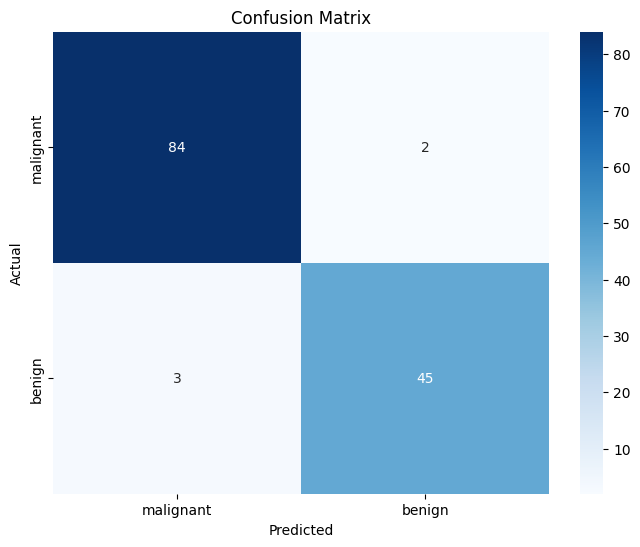

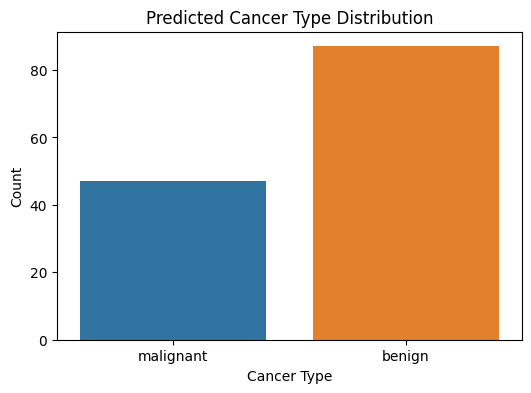

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotting confusion matrix
cm = confusion_matrix(test['name_cancer'], preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer_breast.target_names, yticklabels=cancer_breast.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotting the distribution of predicted values
plt.figure(figsize=(6, 4))
sns.countplot(x=preds)
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Predicted Cancer Type Distribution')
plt.xticks(ticks=[0, 1], labels=cancer_breast.target_names)
plt.show()


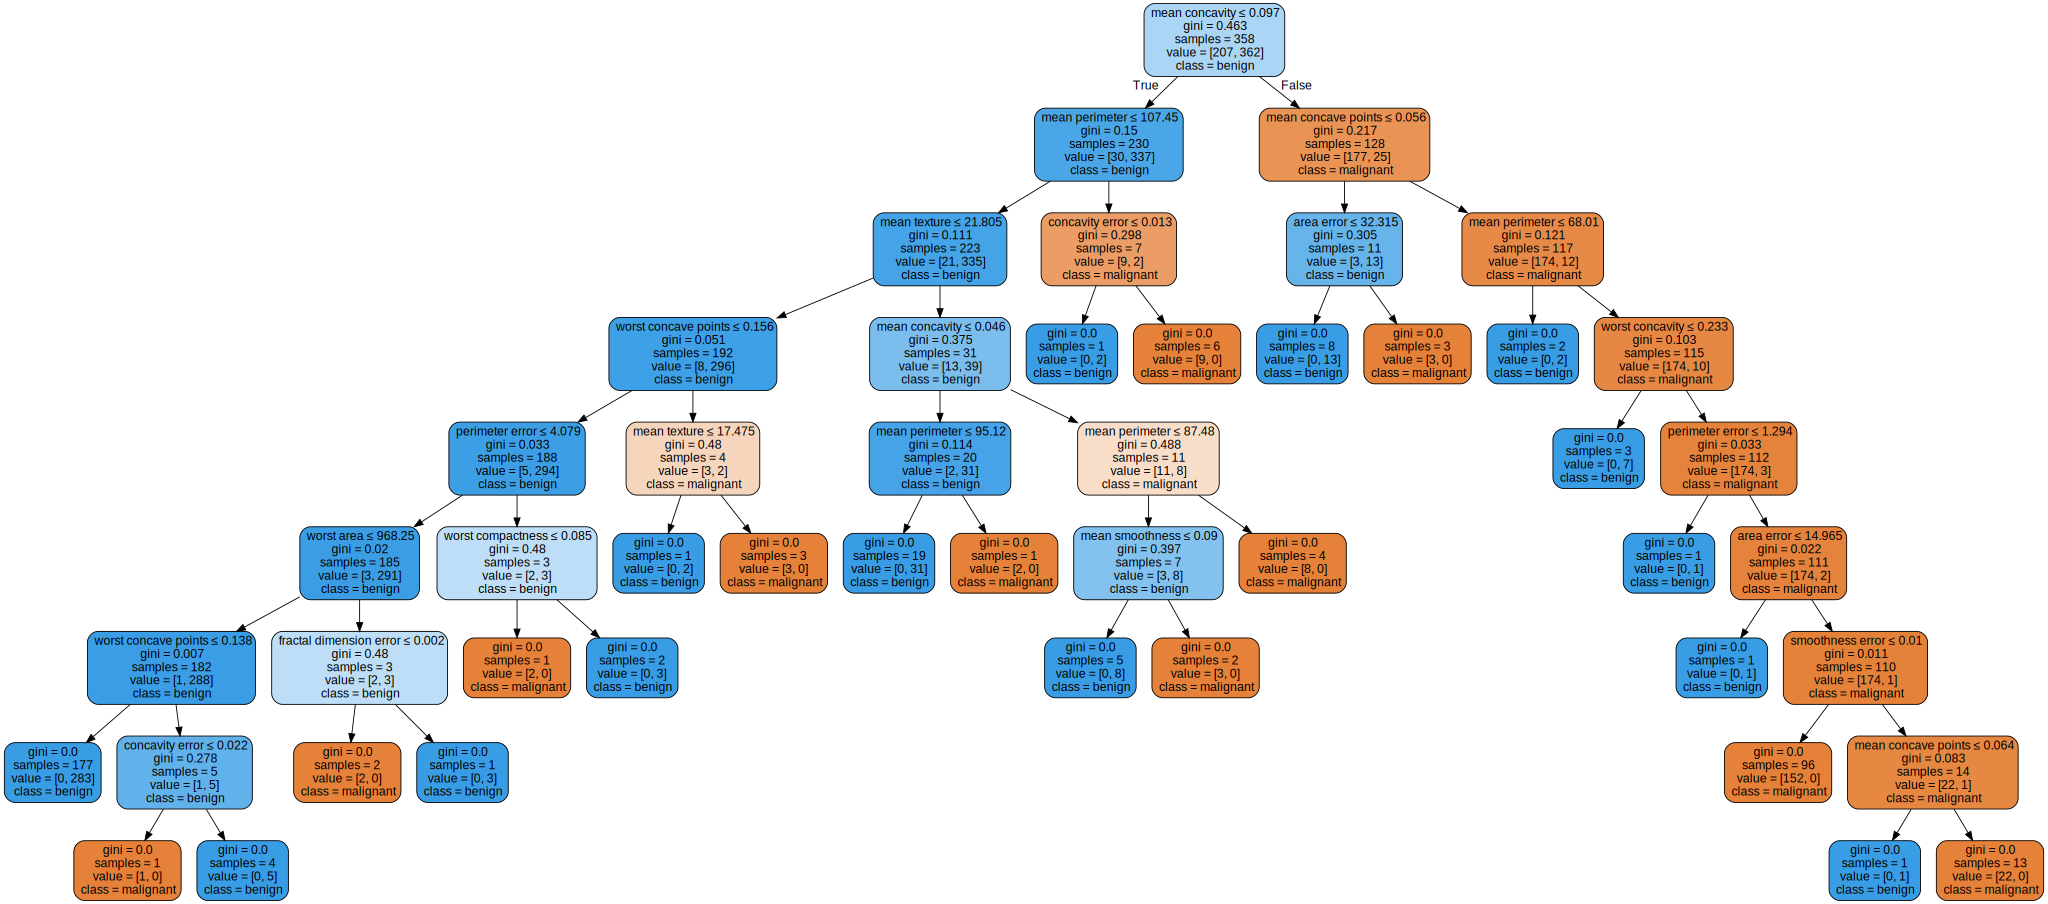

In [24]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
cancer_breast = load_breast_cancer()

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(cancer_breast.data, cancer_breast.target)

# Choose one of the trees from the ensemble (for example, the first tree)
tree = clf.estimators_[0]

# Export the selected tree to DOT format
dot_data = export_graphviz(tree, out_file=None,
                feature_names=cancer_breast.feature_names,
                class_names=cancer_breast.target_names,
                filled=True, rounded=True, special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Display the graph directly in Jupyter Notebook
graph